## **EXPLORATORY DATA ANALYSIS**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # module for plotting 


In [0]:
dataset = pd.read_excel("/content/drive/My Drive/dailySolarWithFeatures.xlsx")

### **Feature to Feature Correlation**

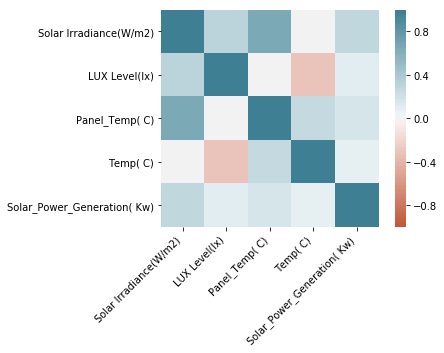

In [0]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

1. Dark blue represents perfect positive correlation.(values move in the same direction)
2. Dark red represents perfect negative correlation(values move in opposite direction)
3. Solar Panel Temperature and Solar Irradiance have positively correlated with each other.(around 0.7)
4. Solar Panel Temperature and Solar Power Generation are weakly positively correlated (0.3)
5. Lux level and solar irradiance are weakly positively correlated(0.3)

**Now we'll try to find which features are strongly correlated withSolar Power Generation**

In [0]:
dataset_corr = dataset.corr()['Solar_Power_Generation( Kw)'][:-1] # -1 because the latest row is Solar_power_generation
features_list = dataset_corr[abs(dataset_corr) > 0].sort_values(ascending=False)
print("There is {}  correlated values with Solar_power_generation:\n{}".format(len(features_list), features_list))

There is 4 strongly correlated values with Solar_power_generation:
Solar Irradiance(W/m2)    0.288834
Panel_Temp( C)            0.172820
LUX Level(lx)             0.113511
Temp( C)                  0.078289
Name: Solar_Power_Generation( Kw), dtype: float64


### Plotting all features in dataset against each other using seaborn pairplot()

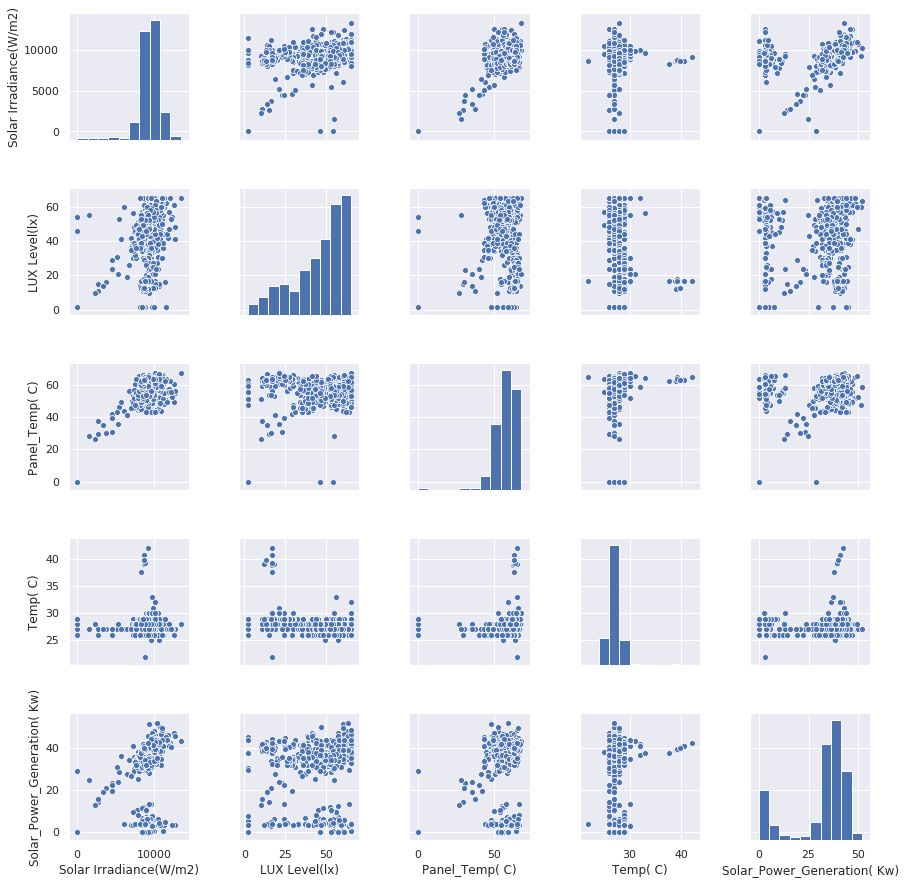

In [0]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(dataset)